# Polynomial Linear Regression

## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries (4).csv


In [16]:
# Import necessary libraries
import io
import pandas as pd

# Read the CSV file from the uploaded content using io.BytesIO
# 'uploaded' is assumed to be a dictionary containing the uploaded files
# 'Position_Salaries.csv' is the key corresponding to the CSV file
dataset = pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']), delimiter=",")

# Display the first 10 rows of the dataset
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,43000
1,Business Analyst,1,45000
2,Business Analyst,1,46000
3,Junior Consultant,2,50000
4,Junior Consultant,2,53000
5,Junior Consultant,2,55000
6,Senior Consultant,3,60000
7,Senior Consultant,3,63000
8,Senior Consultant,3,65000
9,Manager,4,80000


In [17]:
# dataset = pd.read_csv('Position_Salaries.csv')

# Extract the feature variable (X) and target variable (y) from the dataset

# X contains all rows and columns from index 1 (inclusive) to the last column -1 (exclusive)
X = dataset.iloc[:, 1:-1].values

# y contains all rows and the last column only (target variable)
y = dataset.iloc[:, -1].values

In [18]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
print(X_train)

[[10]
 [ 4]
 [ 6]
 [ 8]
 [ 2]
 [ 6]
 [ 3]
 [ 5]
 [ 8]
 [ 7]
 [ 1]
 [10]
 [ 3]
 [ 2]
 [ 7]
 [ 7]
 [ 4]
 [ 3]
 [ 9]
 [ 2]
 [ 1]
 [ 8]
 [ 6]
 [ 5]]


In [20]:
# Import the PolynomialFeatures class from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# Create an instance of the PolynomialFeatures class with a degree of 3
poly_reg_feature_builder = PolynomialFeatures(degree=3)

In [22]:
# Transform the training features into polynomial features
X_train_poly = poly_reg_feature_builder.fit_transform(X_train)

In [23]:
print(X_train_poly)

[[   1.   10.  100. 1000.]
 [   1.    4.   16.   64.]
 [   1.    6.   36.  216.]
 [   1.    8.   64.  512.]
 [   1.    2.    4.    8.]
 [   1.    6.   36.  216.]
 [   1.    3.    9.   27.]
 [   1.    5.   25.  125.]
 [   1.    8.   64.  512.]
 [   1.    7.   49.  343.]
 [   1.    1.    1.    1.]
 [   1.   10.  100. 1000.]
 [   1.    3.    9.   27.]
 [   1.    2.    4.    8.]
 [   1.    7.   49.  343.]
 [   1.    7.   49.  343.]
 [   1.    4.   16.   64.]
 [   1.    3.    9.   27.]
 [   1.    9.   81.  729.]
 [   1.    2.    4.    8.]
 [   1.    1.    1.    1.]
 [   1.    8.   64.  512.]
 [   1.    6.   36.  216.]
 [   1.    5.   25.  125.]]


This code block is used to train and make predictions with a polynomial regression model on a test dataset. It performs the following steps:

- Utilizes the PolynomialFeatures class to prepare polynomial features of the training dataset. The degree parameter determines the polynomial degree to be used. In this code block, degree is set to 3, which means it will calculate all polynomial features up to the third degree, including (**1, position, position^2, position^3**).

- Then, it trains a linear regression model on the training dataset with polynomial features using the LinearRegression class.

- After training the model, the test dataset is transformed into polynomial features prepared by Poly_reg_feature_builder.

- The transformed test dataset is used to predict with the trained polynomial regression model, and the predictions are assigned to the variable y_pred.

If the dataset had two features, such as x1 and x2, PolynomialFeatures(degree=3) would look like this:

1. Constant term: 1
2. Original features: x1, x2
3. Squares of each feature: x1^2, x2^2
4. Cubes of each feature: x1^3, x2^3
5. Multiplication of two features: x1 * x2
6. Multiplication of the square of one feature with the other feature: x1^2 * x2, x1 * x2^2

In [24]:
# Train the Polynomial Regression model
from sklearn.linear_model import LinearRegression

poly_regressor = LinearRegression()

poly_regressor.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
# Transform the test features into polynomial features using the same PolynomialFeatures instance
X_test_poly = poly_reg_feature_builder.fit_transform(X_test)

# Use the trained polynomial regressor to make predictions on the polynomial test features
y_pred = poly_regressor.predict(X_test_poly)

In [31]:
# Evaluating the model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9718384300942023

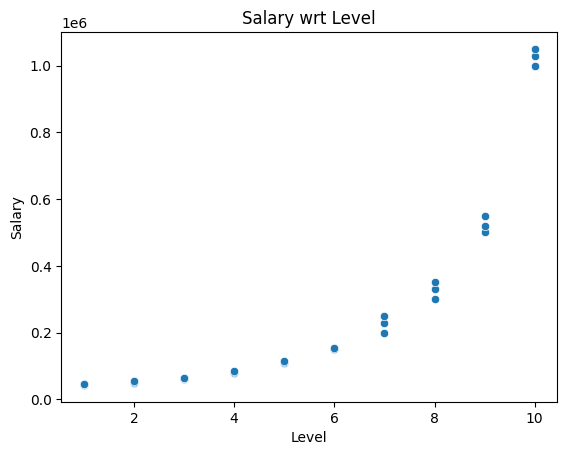

In [32]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a scatter plot using Seaborn for 'Level' vs. 'Salary'
sns.scatterplot(x='Level', y='Salary', data=dataset)

# Adding a title and axis labels
plt.title('Salary wrt Level')  # Add title
plt.xlabel('Level')  # Add x-axis label
plt.ylabel('Salary')  # Add y-axis label

# Display the plot
plt.show()

We can calculate the Pearson Correlation Coefficient to determine whether a given dataset is linear. The Pearson Correlation Coefficient measures the strength and direction of the linear relationship between two variables. If this coefficient is close to +1, it indicates a strong positive linear relationship; if it is close to -1, it indicates a strong negative linear relationship; and if it is close to 0, it suggests a weak or no linear relationship.


Let's calculate this correlation coefficient using pandas and scipy libraries in Python:

In [33]:
# Import necessary libraries
import pandas as pd
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient between 'Level' and 'Salary'
corr, _ = pearsonr(dataset['Level'], dataset['Salary'])

# Print the Pearson correlation coefficient
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 0.8277910876671384
